# Iterative Solver

## Problem 1

In [1]:
from scipy import optimize as opt
import numpy as np
import scipy.linalg
from matplotlib import pyplot as plt

In [2]:
def diag_dom(n, num_entries=None):
    if num_entries is None:
        num_entries = int(n**1.5) - n
        A = np.zeros((n,n))
        rows = np.random.choice(np.arange(0,n), size=num_entries)
        cols = np.random.choice(np.arange(0,n), size=num_entries)
        data = np.random.randint(-4, 4, size=num_entries)
        for i in range(num_entries):
            A[rows[i], cols[i]] = data[i]
            for i in range(n):
                A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [3]:
A = diag_dom(10, num_entries=None)
D = np.array([A[i][i] for i in range(len(A))])

In [4]:
def myfun1(A,b,tol=1e-9, maxiters=1000):
    D = np.array([A[i][i] for i in range(len(A))])
    Dinv= 1/D
    x0= np.zeros([len(A)]) #initial guess
    xk=x0
    
    for ii in range(maxiters):
        xk1=xk+Dinv*(b-A@xk) 
        e=scipy.linalg.norm((xk1-xk),np.inf)
        xk=xk1
        
        if e < tol or ii == maxiters:
            break
    return xk, ii

In [5]:
b=np.random.random(len(D))
xk, ii =myfun1(A,b,tol=1e-9, maxiters=1000)
np.allclose(b,A@xk,rtol= 1e-9)

True

## Problem 2

In [6]:
def myfun2(A,b,tol=1e-9, maxiters=1000, plot=False):
    Dinv= 1/D
    x0= np.zeros([len(A)]) #initial guess
    xk=x0
    e=np.zeros((maxiters))
    iters=np.zeros((maxiters))
    
    for ii in range(maxiters):
        xk1=xk+Dinv*(b-A@xk) 
        e[ii]=scipy.linalg.norm(np.abs((xk1-xk)),np.inf)
        iters[ii]=ii
        xk=xk1
        
        if e[ii] < tol or ii == maxiters:
            break
    if plot == True:
        plt.semilogy(iters[0:ii+1], np.abs(e[0:ii+1]));
        plt.ylabel("Absolute Error of Approximation")
        plt.xlabel("Iteration")
        plt.suptitle("Convergence of Jacobi Method")
    
    return xk, iters, e

True

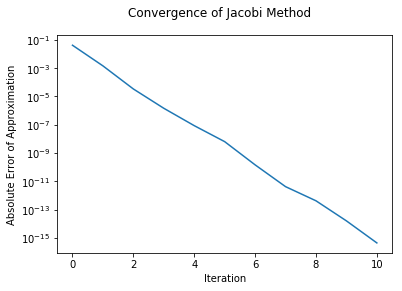

In [9]:
A = diag_dom(10)
D = np.array([A[i][i] for i in range(len(A))])
b=np.random.random(len(A))
xk, iters, e =myfun2(A,b,tol=1e-15, maxiters=1000, plot=True)
np.allclose(b,A@xk,rtol= 1e-15)

## Problem 3

In [10]:
def myfun3(A,b,tol=1e-9, maxiters=1000, plot=False):
    xk=np.zeros([len(A)])
    xk1=np.zeros([len(A)])
    iters=np.zeros([len(A)])
    e=np.zeros([len(A)])

    converged = False
    for ii in range(maxiters):
        for jj in range(len(A)):
            xk1[jj]=xk[jj]+(1/A[jj,jj])*(b[jj]-A[jj,:].T@xk)
            e[ii]=scipy.linalg.norm(xk1-xk ,np.inf)
            iters[ii]= ii
        if e[ii] < tol:
            converged = True 
            break
               
        else:
            xk=np.copy(xk1)
    if plot == True:
        plt.semilogy(iters[0:ii+1], np.abs(e[0:ii+1]));
        plt.ylabel("Absolute Error of Approximation")
        plt.xlabel("Iteration")
        plt.suptitle("Convergence")
        
    return xk1, ii, e , converged

Converged: True
Iterations: 7
Xk1: [0.02689831 0.03128909 0.01472622 0.01108606 0.02476991 0.00365844
 0.00897345 0.01348567 0.05719366 0.01731214]


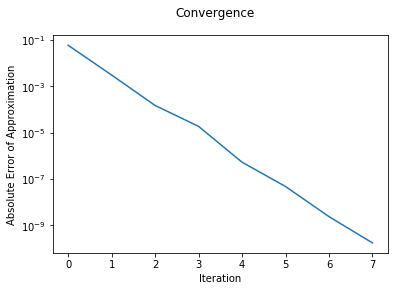

In [11]:
A = diag_dom(10)
b=np.random.random(len(A))
xk1, iters, e, converged =myfun3(A,b,tol=1e-9, maxiters=1000, plot=True)
print("Converged: "+str(converged))
print("Iterations: "+str(iters))
print("Xk1: "+str(xk1))

In [12]:
np.allclose(b,A@xk1,rtol= 1e-9)

True

## Problem 4

In [13]:
def myfun4(A,b,tol=1e-9, maxiters=1000):
    s1,s2=A.shape
    xk=np.zeros([s1])
    xk1=np.zeros([s1])   
    
    converged = False
    
    for ii in range(maxiters):
        for jj in range(s1):
            rowstart = A.indptr[jj]
            rowend = A.indptr[jj+1]
            Aix = A.data[rowstart:rowend] @ xk[A.indices[rowstart:rowend]]
            
            xk1[jj]=xk[jj]+(1/A[jj,jj])*(b[jj]-Aix)
            e=scipy.linalg.norm(xk1-xk ,np.inf)
            
        if e < tol:
            converged = True 
            break
               
        else:
            xk=np.copy(xk1)
    return xk1, ii, e , converged

Note: my computer had serious issues constructing A. Hence I lowered the number 

In [47]:
from scipy import sparse
#A = sparse.csr_matrix(diag_dom(800))
b = np.random.random(800)

In [52]:
xk1, iters, e , converged= myfun4(A,b,tol=1e-15, maxiters=1000)
iters, e , converged

(3, 6.166399856011306e-19, True)

## Problem 5

In [53]:
def myfun5(A,b,omega,tol=1e-9, maxiters=1000):
    s1,s2=A.shape
    xk=np.zeros([s1])
    xk1=np.zeros([s1])   
    
    converged = False
    
    for ii in range(maxiters):
        for jj in range(s1):
            rowstart = A.indptr[jj]
            rowend = A.indptr[jj+1]
            Aix = A.data[rowstart:rowend] @ xk[A.indices[rowstart:rowend]]
            
            xk1[jj]=xk[jj]+(omega/A[jj,jj])*(b[jj]-Aix)
            e=scipy.linalg.norm(xk1-xk ,np.inf)
            
        if e < tol:
            converged = True 
            break
               
        else:
            xk=np.copy(xk1)
    return xk1, ii, e , converged

In [60]:
omega=0.09
xk1, iters, e , converged= myfun5(A,b,omega,tol=1e-9, maxiters=1000)

In [61]:
iters, e

(83, 9.35134083232883e-10)